In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # high res plotting
import pyxdf
import mne
import numpy as np
import scipy as sp

from scipy import signal
from scipy import io

from neurodsp import spectral
from neurodsp import filt
from neurodsp import sim
# from fooof.plts.templates import plot_spectrum

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12,9)})
sns.set_style('whitegrid')
sns.set_style("whitegrid", {'axes.grid' : False})
import fooof
from fooof import FOOOF
from fooof import FOOOFGroup


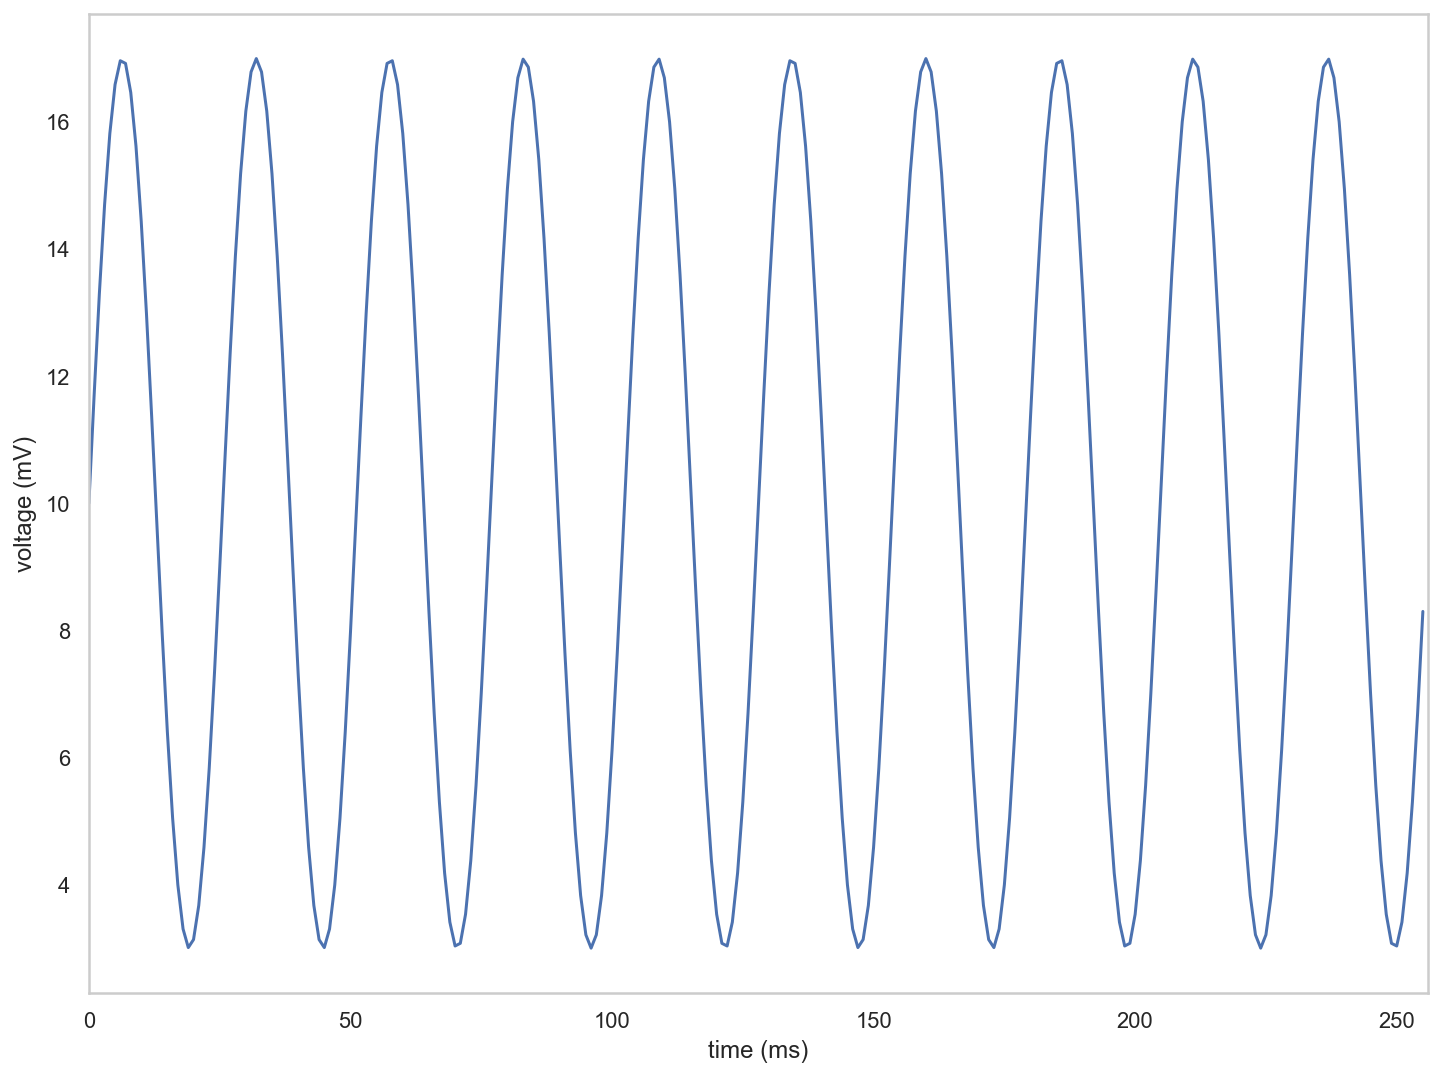

In [2]:
def sine_func(fs, freq, amp, time):
    samples = fs*time
    time = np.arange(samples)
    voltage = amp * np.sin(2 * np.pi * freq * time / fs)
    
    return time, voltage

fs = 256 # sampling rate

freq = 10 # in Hz
amp = 7 # in arbitrary units (au)
duration = 1 # in seconds

time, sine = sine_func(fs, freq, amp, duration)
sine = sine + 10 # add a DC offset

# plot some of the time series data
plt.plot(time, sine)
plt.xlabel('time (samples)')
plt.ylabel('voltage (mV)')
plt.xlim((0,256)) # just plot the first second
plt.show()

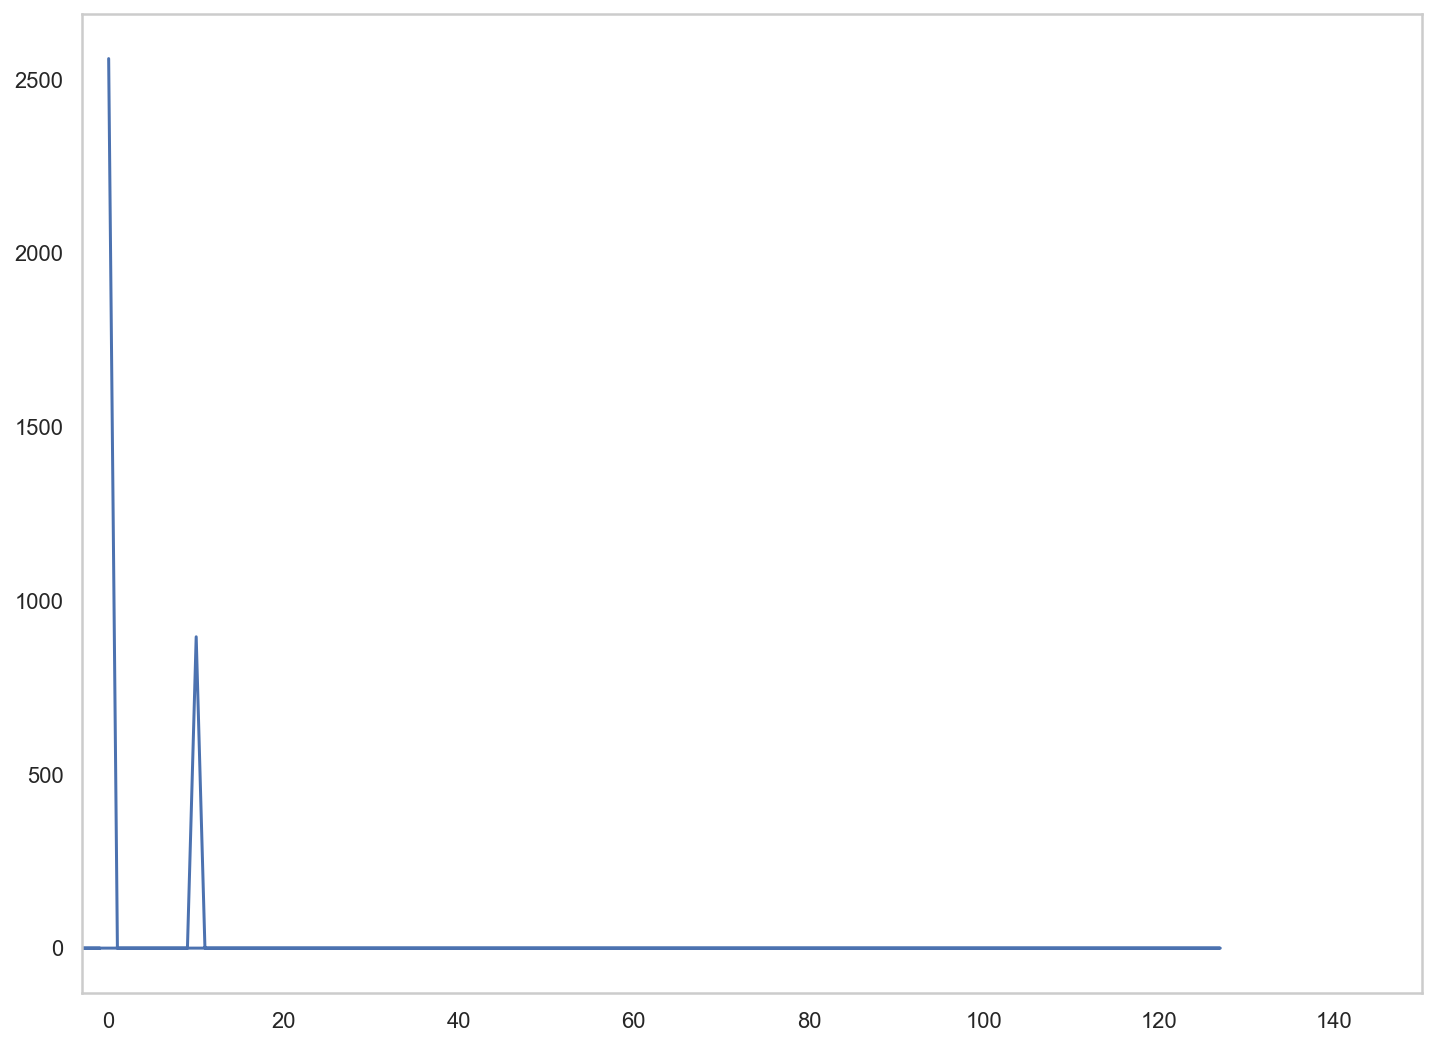

In [3]:
sp = np.abs(np.fft.fft(sine)) # get the power spectrum of the simulated data
freq = np.fft.fftfreq(sine.shape[-1])*fs # get the frequencies from the FFT

# plot the spectrum
plt.plot(freq, sp)
plt.xlim((-3, 150))
plt.show()

In [4]:


fs = 256
alpha_range = [7, 9]
gamma_range = [50, 70]

# import the data

#signal = raw_EC.pick_channels(['O1'])
signal = raw_EC.get_data()
print(signal.shape)

print(signal[18,:])


# set the time axis
n_seconds = len(signal[0,:])/fs
times = np.arange(0, n_seconds, 1/fs)


# Plot signal segment of 1000 time points = 3.9 seconds
segment = [0, 1000]
plt.plot(times[segment[0]:segment[1]], signal[10,segment[0]:segment[1]], 'k', alpha = 0.7)
plt.show()

segment = [0, 256]
plt.plot(times[segment[0]:segment[1]], signal[10,segment[0]:segment[1]], 'k', alpha = 0.7)
plt.show()


NameError: name 'raw_EC' is not defined

C:\Users\jaket\AppData\Local\Temp/ipykernel_21156/438704073.py:1: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw_EC = mne.io.read_raw_eeglab(r'C:\Users\jaket\COGS280\previous\MichaelEOxdf.set')


(19, 30390)
[1.42765907e-05 1.61442265e-05 1.55652983e-05 ... 2.29889107e-05
 2.00621419e-05 2.12469595e-05]


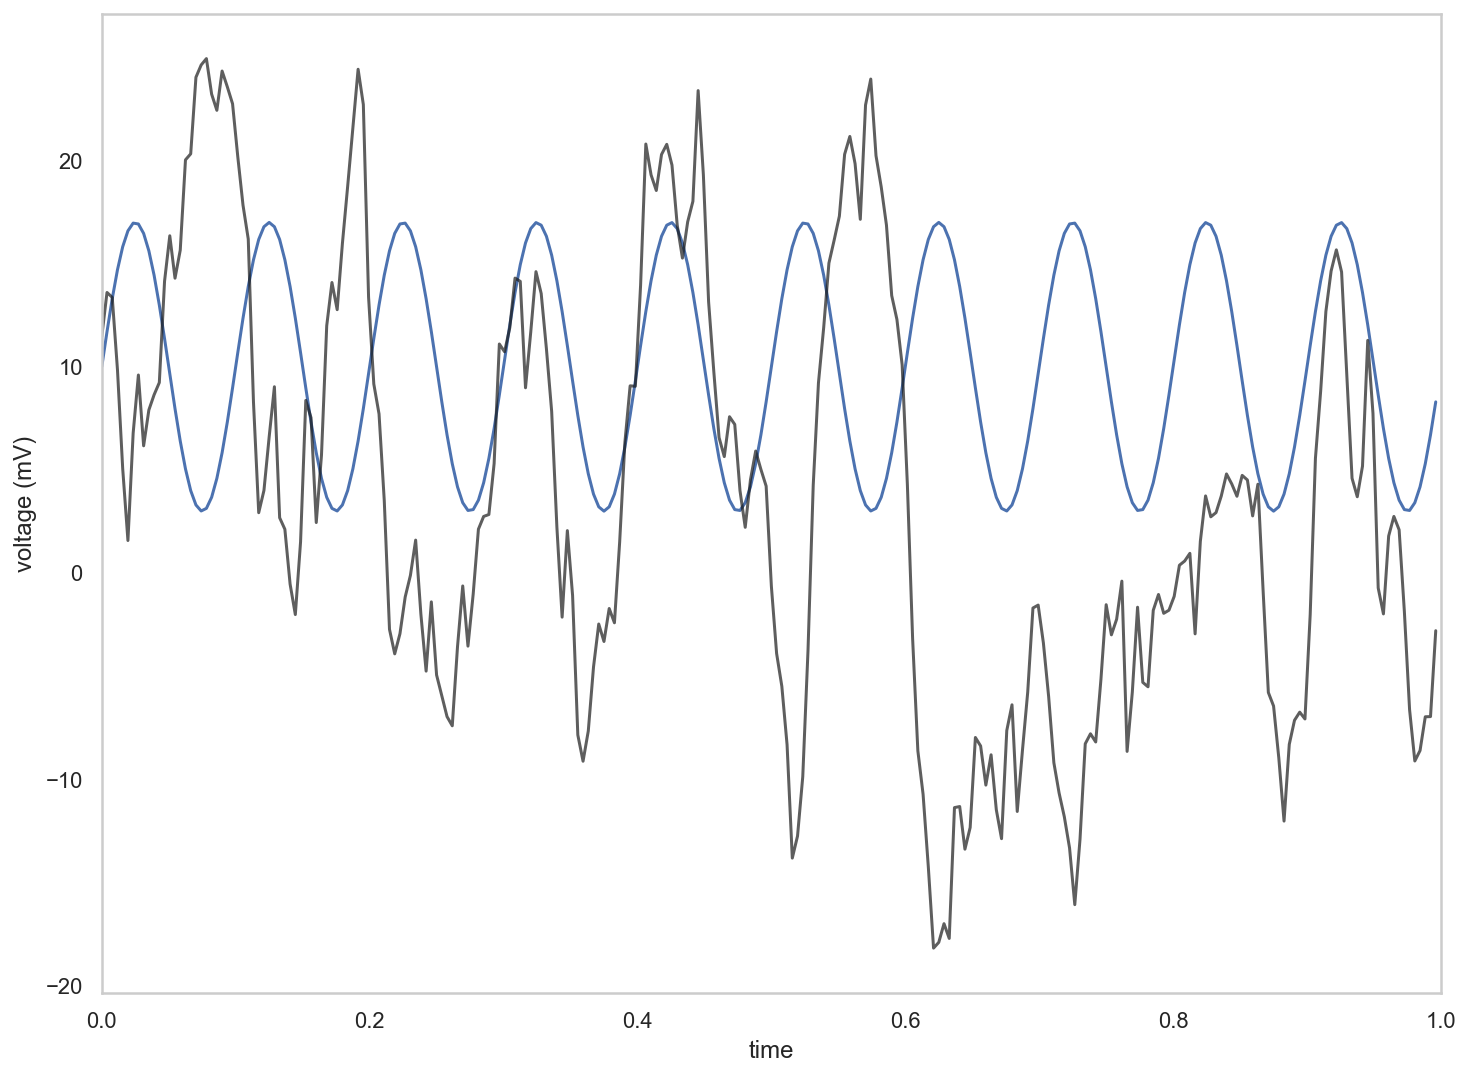

In [ ]:
raw_EC = mne.io.read_raw_eeglab(r'C:\Users\jaket\COGS280\previous\MichaelEOxdf.set')
fs = 256

segment = [0, 256]

signal = raw_EC.get_data()
print(signal.shape)


# set the time axis
n_seconds = len(signal[0,:])/fs
times = np.arange(0, n_seconds, 1/fs)


# Plot signal segment of 1000 time points = 3.9 seconds

freq = 10 # in Hz
amp = 7 # in arbitrary units (au)
duration = 1 # in seconds

time, sine = sine_func(fs, freq, amp, duration)
sine = sine + 10 # add a DC offset

# plot some of the time series data
plt.plot(times[segment[0]:segment[1]], sine)
plt.xlabel('time')
plt.ylabel('voltage (mV)')
plt.xlim((0,1)) # just plot the first second
plt.plot(times[segment[0]:segment[1]], (signal[10,segment[0]:segment[1]]*1000000), 'k', alpha = 0.7)
plt.show()

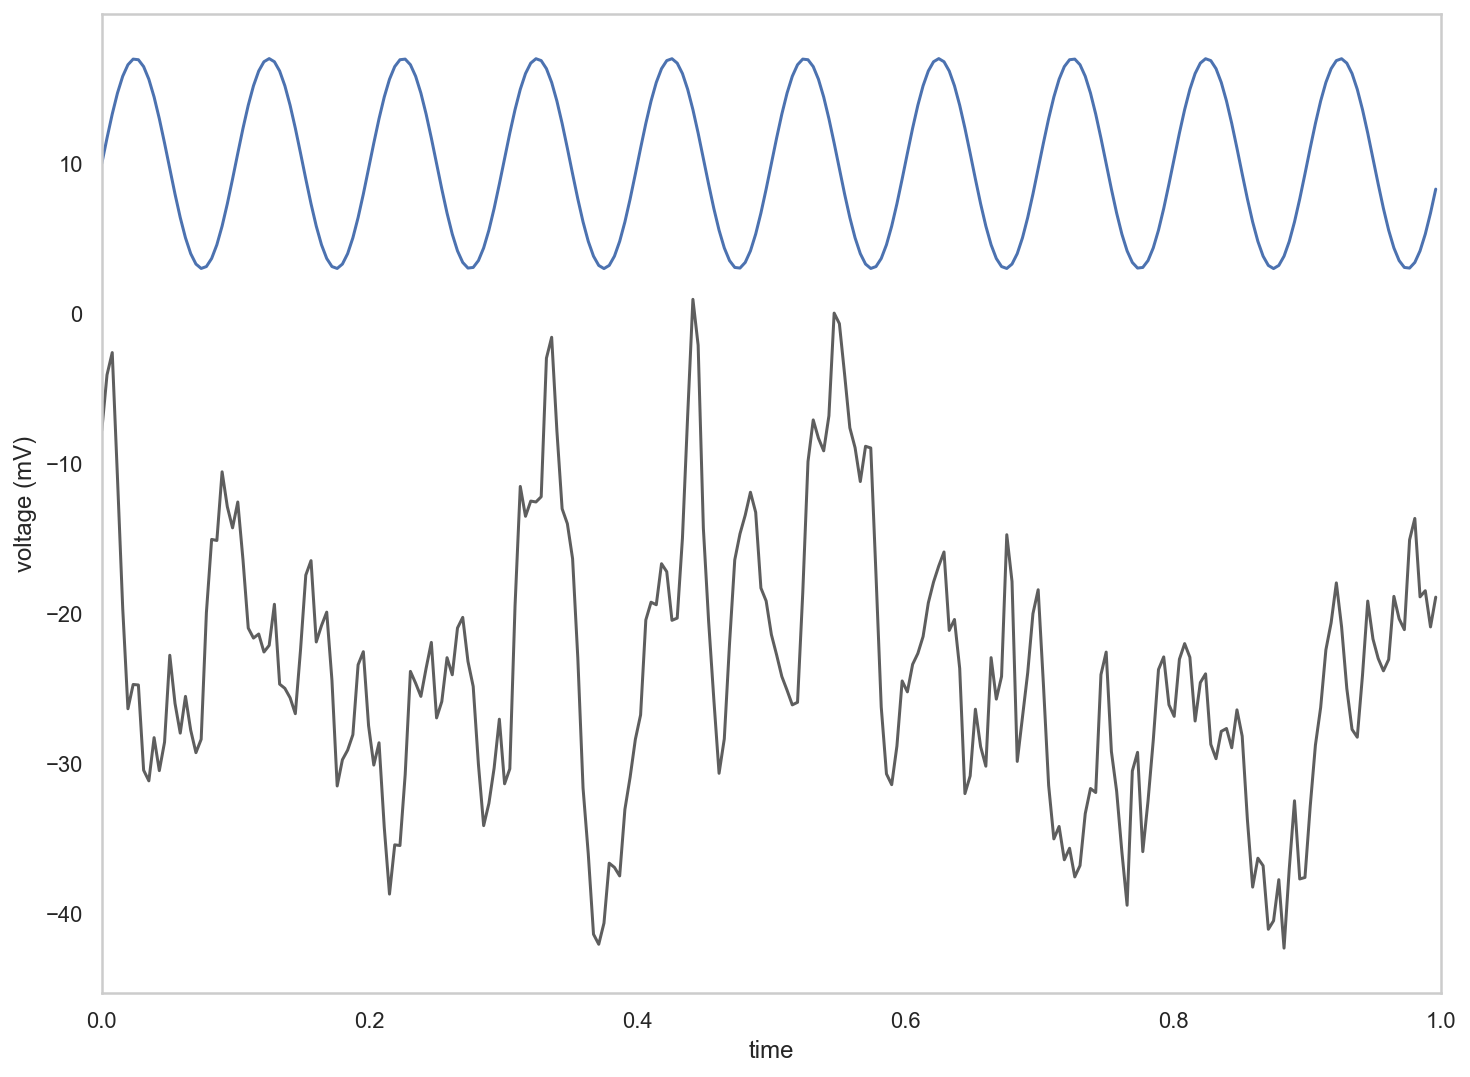

In [ ]:
signal = raw_EC.pick_channels(['O1']).get_data()[0]

plt.plot(times[segment[0]:segment[1]], sine)
plt.xlabel('time')
plt.ylabel('voltage (mV)')
plt.xlim((0,1)) # just plot the first second
plt.plot(times[segment[0]:segment[1]], (signal[segment[0]:segment[1]]*1000000-30), 'k', alpha = 0.7)
plt.show()



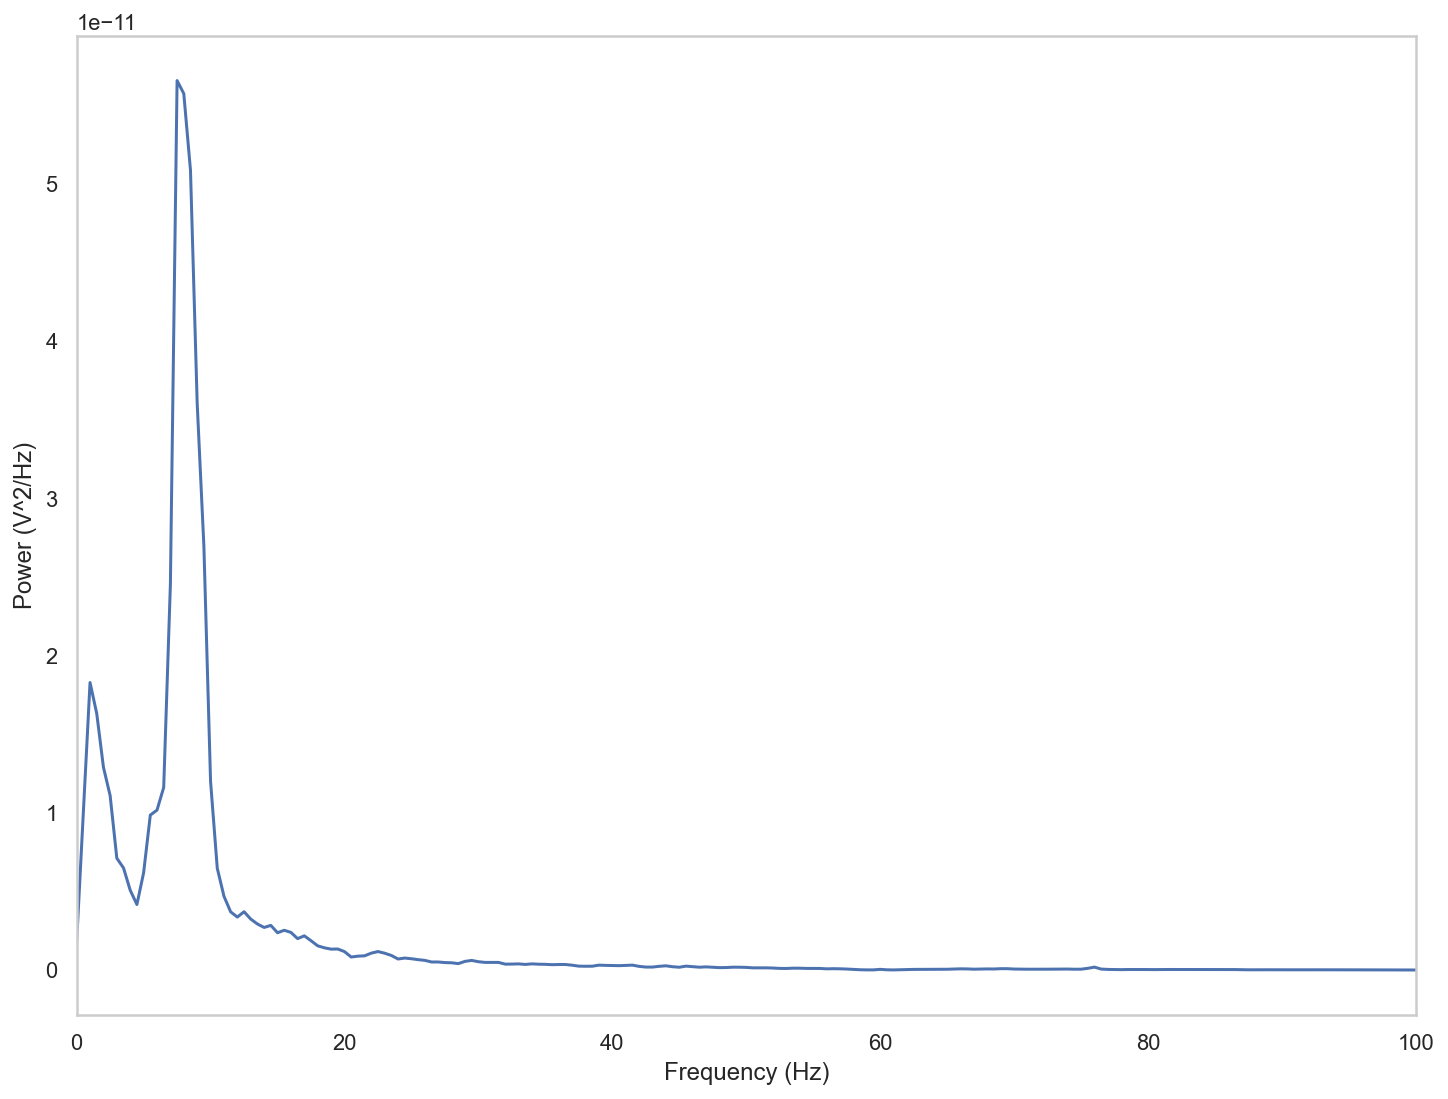

In [ ]:
freq_mean, P_mean = spectral.compute_spectrum(signal, fs, method='welch', window='hann', nperseg=fs*2) # mean of spectrogram (Welch)
# This breaks the data up into two-second windows (nperseg=fs*2)
# It then applies a hanning window to the time-series windows (window='hann')
# It then FFTs each hanning'd window, and then averages all those FFTs (method='mean')

plt.plot(freq_mean, P_mean)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (V^2/Hz)')
plt.xlim((0, 100))
plt.show()

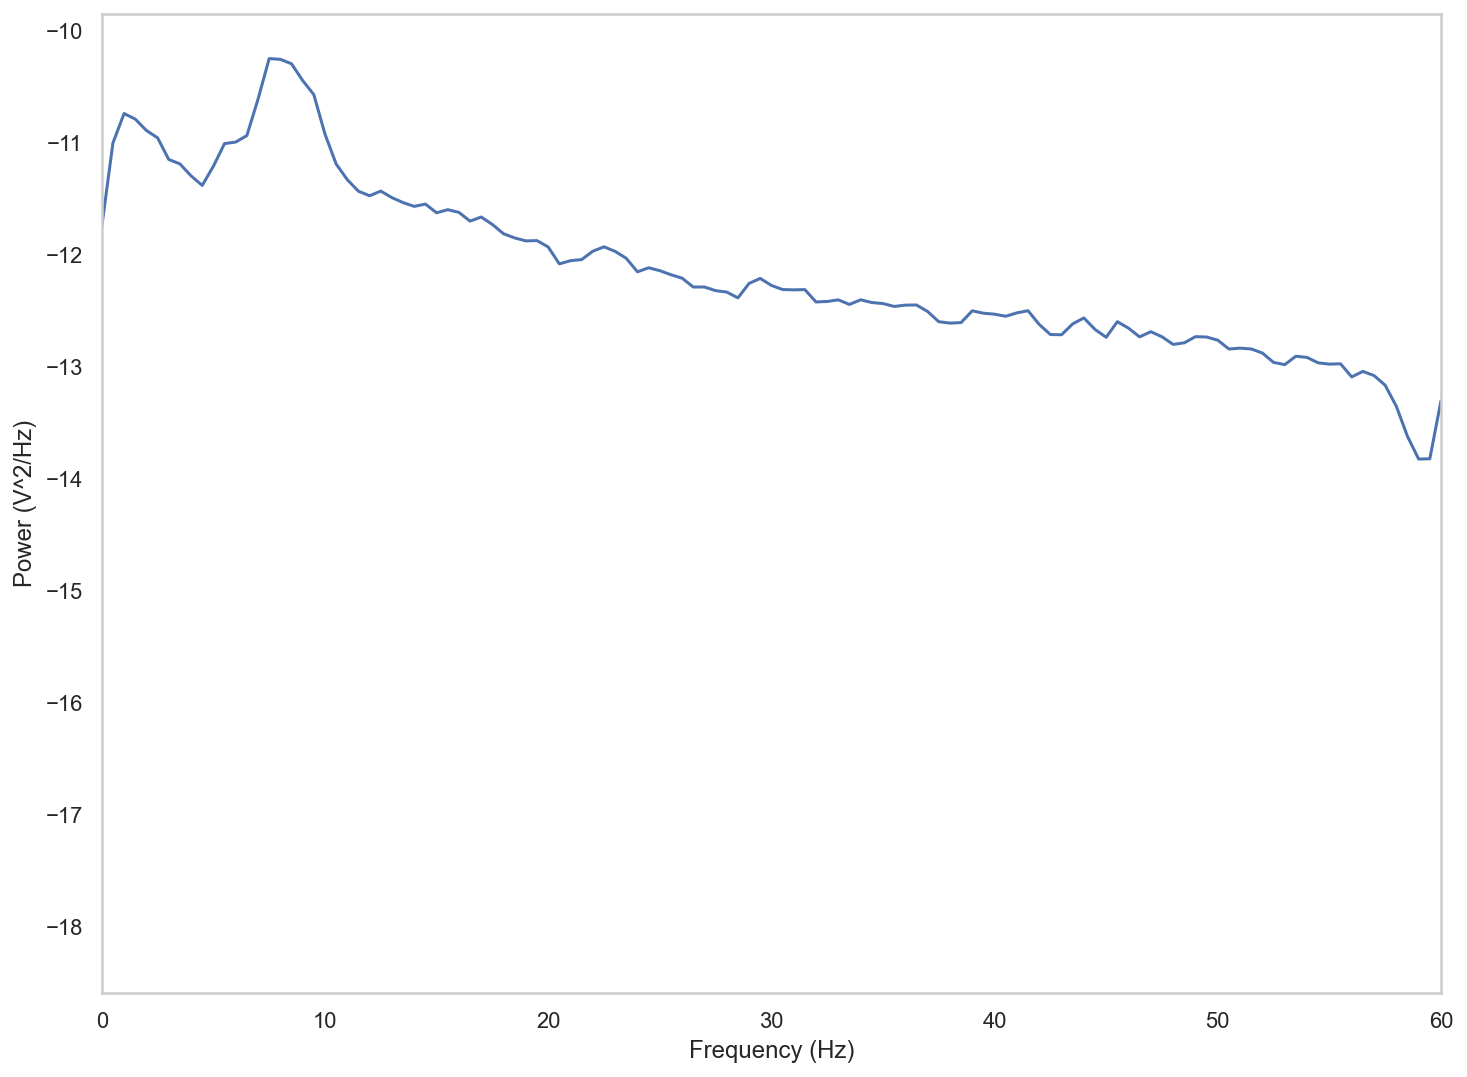

In [ ]:
# plot again, but log scale the power

plt.plot(freq_mean, np.log10(P_mean))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (V^2/Hz)')
plt.xlim(0,60)
plt.show()

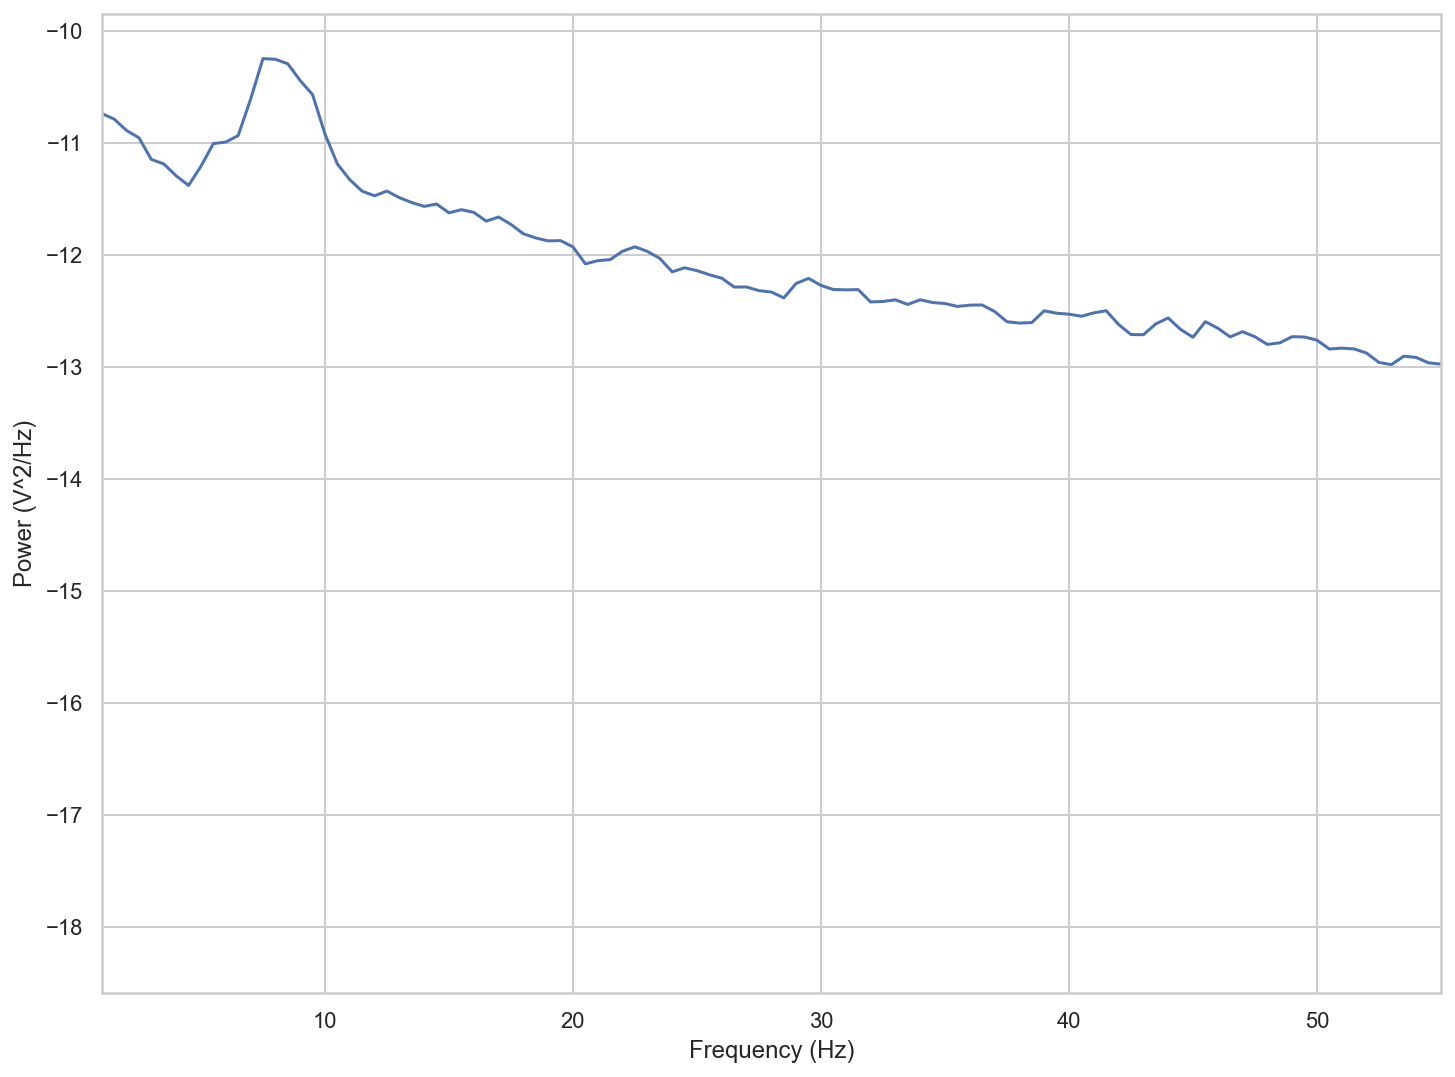

In [ ]:
# plot again, but log scale the power, zoom in below 60 Hz, and log scale the frequency axis

plt.plot(freq_mean, np.log10(P_mean))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (V^2/Hz)')
plt.xlim((1, 55))
plt.grid(True)
plt.show()

In [ ]:
from scipy.signal import sosfiltfilt, butter, hilbert
from scipy import io

from pingouin import circ_corrcl

def butter_bandpass(data, fs, filt_freq, order):
    # make sure that the user provides two frequencies for bandpass filter
    try:
        # renormalize frequencies in Hz to fractional scale required by butter
        nyq = 0.5 * fs # nyquist frequency
        f0 = (filt_freq[0]/nyq)
        f1 = (filt_freq[1]/nyq)

        # highpass first
        sos = butter(order, f0, btype = 'high', analog=False, output='sos')
        y = sosfiltfilt(sos, data)

        # then lowpass
        sos = butter(order, f1, btype = 'low', analog=False, output='sos')
        y = sosfiltfilt(sos, y)
        
        return y
    
    except:
        print("filt_freq must have two frequencies for a bandpass filter")

c:\Users\jaket\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
c:\Users\jaket\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


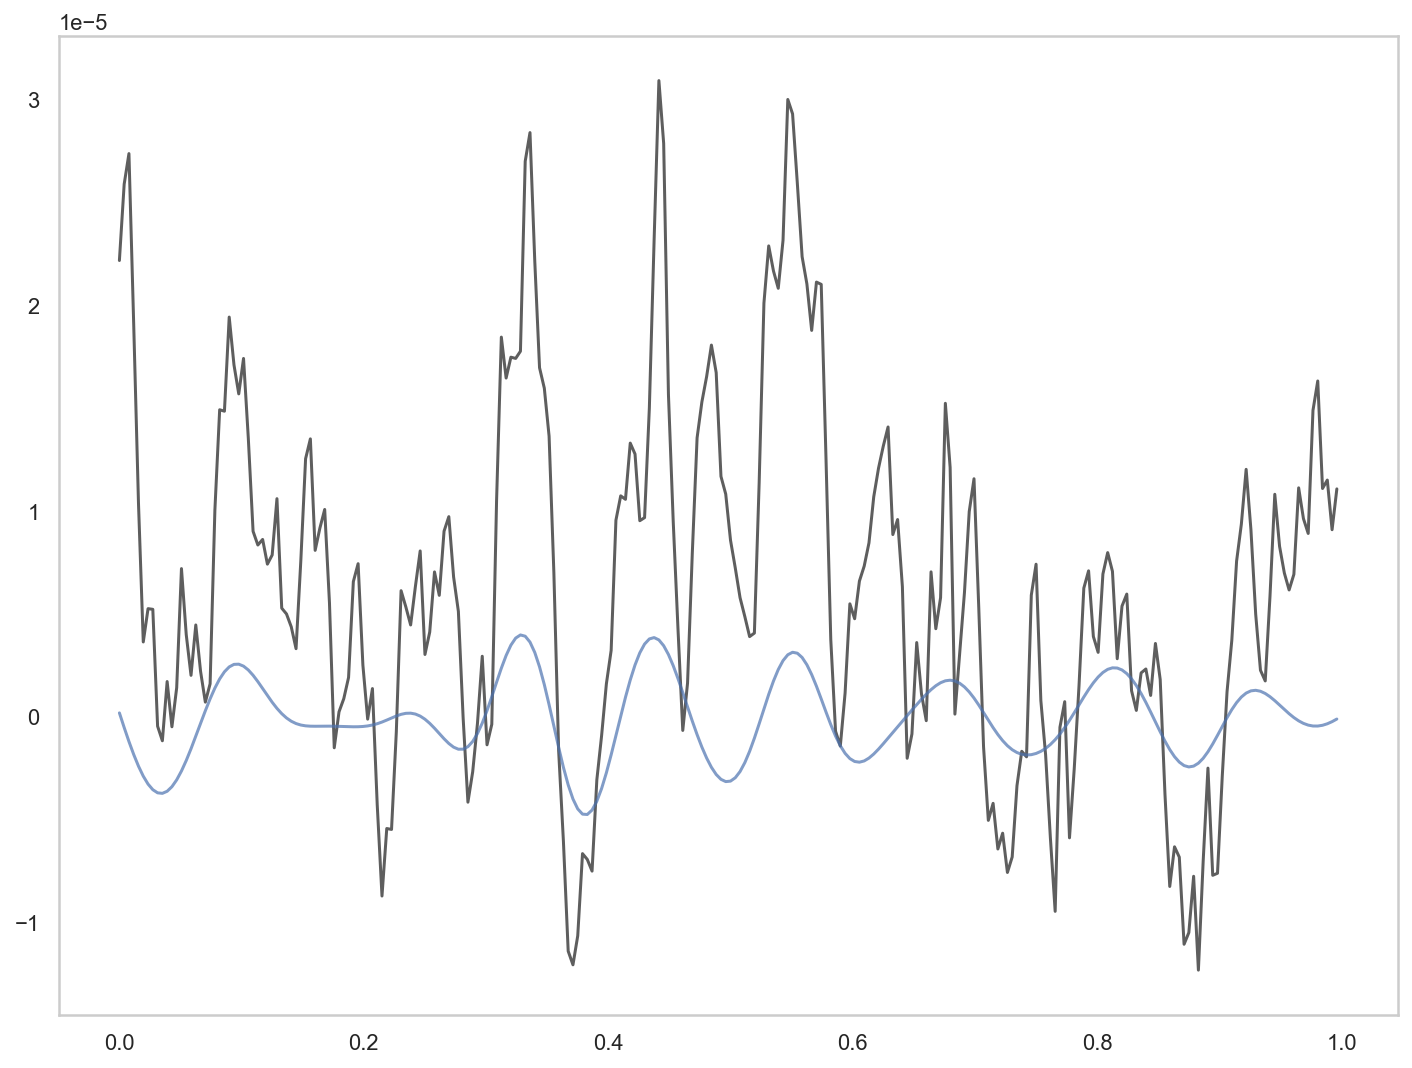

In [ ]:
# Define the frequency band of interest
fs = 256
alpha_range = [7, 9]
n_seconds = len(signal)/fs
times = np.arange(0, n_seconds, 1/fs)

# Bandpass filter the data
alpha_signal = butter_bandpass(signal, fs=fs, filt_freq=alpha_range, order=3)


segment = [0, 256]
plt.plot(times[segment[0]:segment[1]], signal[segment[0]:segment[1]], 'k', alpha = 0.7)
plt.plot(times[segment[0]:segment[1]], alpha_signal[segment[0]:segment[1]], 'b', alpha = 0.7)

plt.show()

C:\Users\jaket\AppData\Local\Temp/ipykernel_21156/528339176.py:1: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw_EC = mne.io.read_raw_eeglab(r'C:\Users\jaket\COGS280\previous\MichaelEOxdf.set')


0.0018712271773607455
                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 3 - 40 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -9.8498, 1.8883                                          
                                                                                                  
                                       2 peaks were found:                             

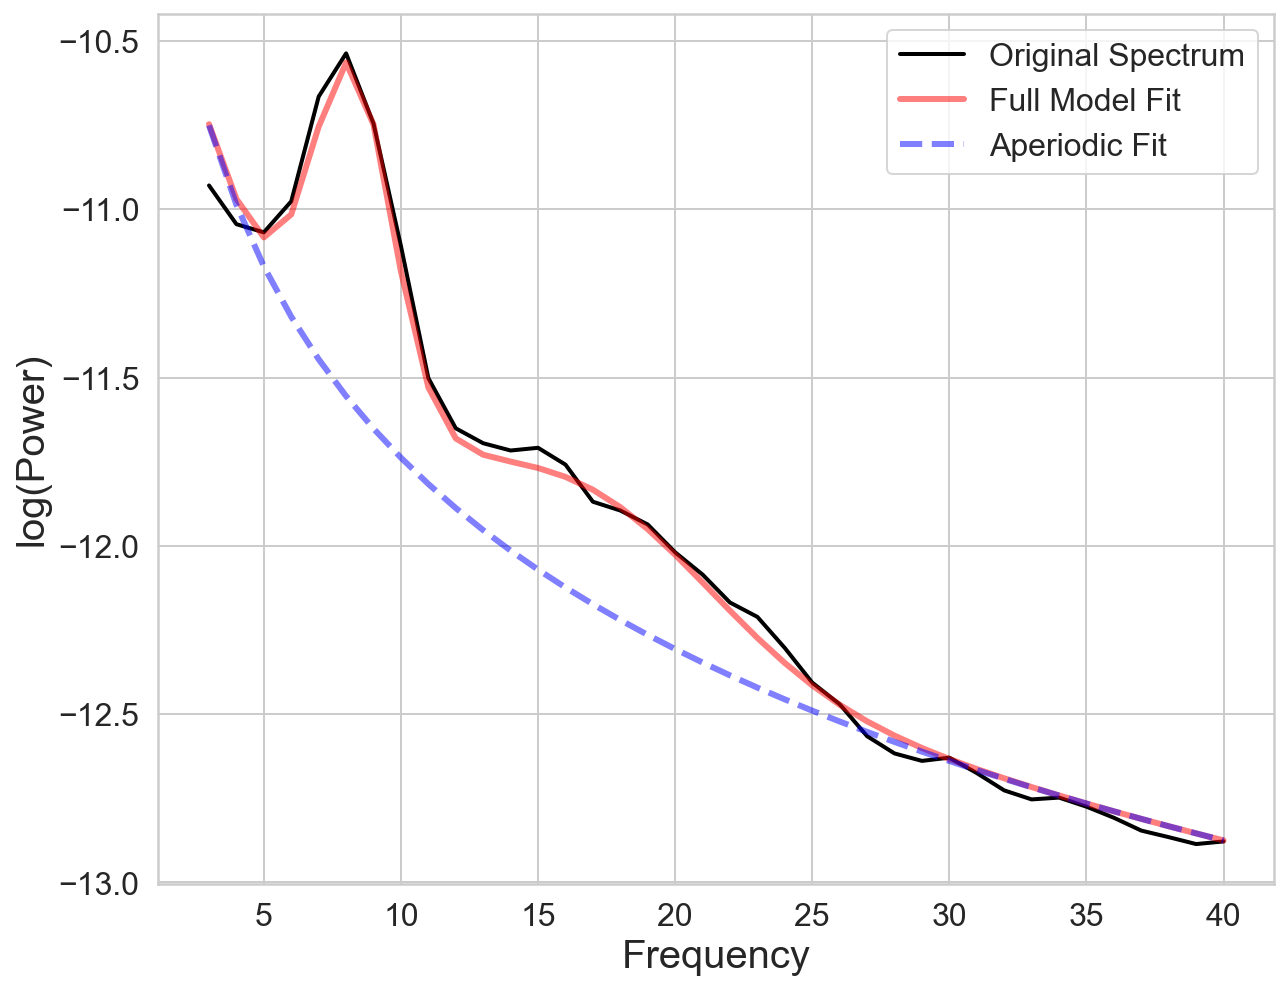

In [ ]:
raw_EC = mne.io.read_raw_eeglab(r'C:\Users\jaket\COGS280\previous\MichaelEOxdf.set')
from scipy.stats import pearsonr

channels = getattr(raw_EC, "ch_names")

i = 0
j = 0


n_channels = len(channels)
tau = 5
time_points = len(raw_EC)
Forw = np.zeros((n_channels, n_channels))
Rev = np.zeros((n_channels, n_channels))

forw_data = raw_EC.get_data()
rev_data = np.flip(forw_data, 1)


for i in range(n_channels):
    for j in range(n_channels):
      x = pearsonr(forw_data[i,0:time_points-tau], forw_data[j,tau:time_points])
      y = pearsonr(rev_data[i,0:time_points-tau], rev_data[j,tau:time_points])
      Forw[i,j] = x[0]
      Rev[i,j] = y[0]
Forw = -1/2 * np.log(1 - (Forw**2))
Rev = -1/2 * np.log(1 - (Rev**2))
irrev = np.mean((Forw - Rev)**2)
print(irrev)

freq_range = [3, 40]
fo = FOOOF()
fo.verbose = False
freqs, spectra = spectral.compute_spectrum(forw_data, fs)
spectra = np.mean(spectra, axis=0)
fo.add_data(freqs, spectra, freq_range)
fo.fit()
fo.report()
aperi = fo.get_params('aperiodic_params','exponent')
print('1/f slope: ')
print(aperi)


(19, 30390)
0.0
                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 3 - 40 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                        -28.5978, -1.1327                                         
                                                                                                  
                                       1 peaks were found:                                   

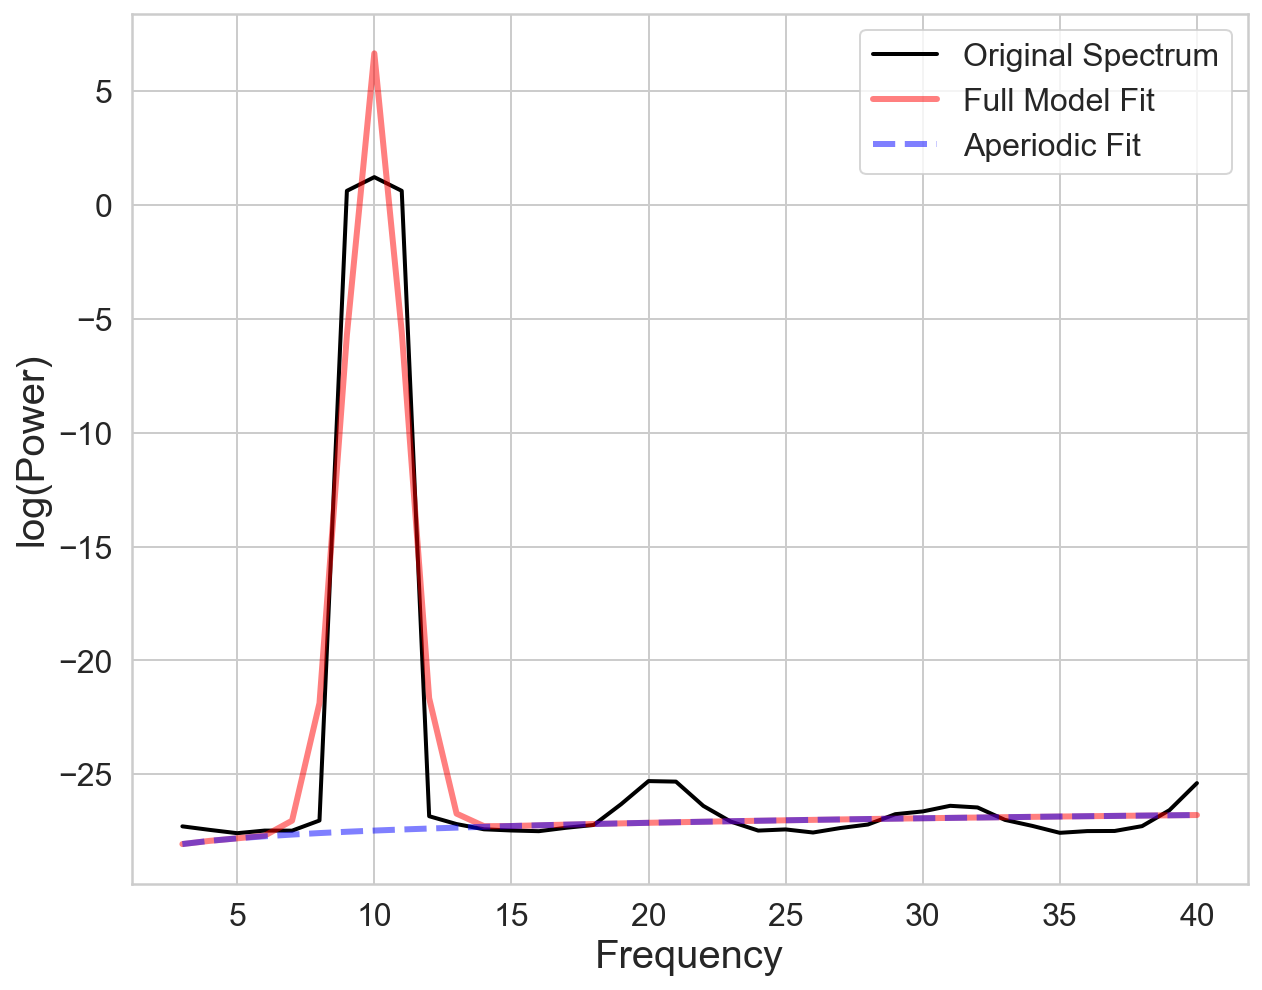

In [ ]:
fs = 256 # sampling rate

def sine_func(fs, freq, amp, time):
    samples = fs*time
    time = np.arange(samples)
    voltage = amp * np.sin(2 * np.pi * freq * time / fs)
    
    return time, voltage

fs = 256 # sampling rate
time_points = len(raw_EC)

freq = 10 # in Hz
amp = 7 # in arbitrary units (au)
duration = time_points/fs # in seconds

time, sine = sine_func(fs, freq, amp, duration)
sine = sine + 10 # add a DC offset


all_alpha = np.tile(sine, (19, 1))

print(new_array.shape)

i = 0
j = 0

n_channels = 19
tau = 5
time_points = len(raw_EC)

Forw = np.zeros((n_channels, n_channels))
Rev = np.zeros((n_channels, n_channels))

forw_data = all_alpha
rev_data = np.flip(forw_data, 1)


for i in range(n_channels):
    for j in range(n_channels):
      x = pearsonr(forw_data[i,0:time_points-tau], forw_data[j,tau:time_points])
      y = pearsonr(rev_data[i,0:time_points-tau], rev_data[j,tau:time_points])
      Forw[i,j] = x[0]
      Rev[i,j] = y[0]
Forw = -1/2 * np.log(1 - (Forw**2))
Rev = -1/2 * np.log(1 - (Rev**2))
irrev = np.mean((Forw - Rev)**2)
print(irrev)


freq_range = [3, 40]
fo = FOOOF()
fo.verbose = False
freqs, spectra = spectral.compute_spectrum(forw_data, fs)
spectra = np.mean(spectra, axis=0)
fo.add_data(freqs, spectra, freq_range)
fo.fit()
fo.report()
aperi = fo.get_params('aperiodic_params','exponent')
print('1/f slope: ')
print(aperi)
# a perfect sine wave has an irreversibility of basically 0

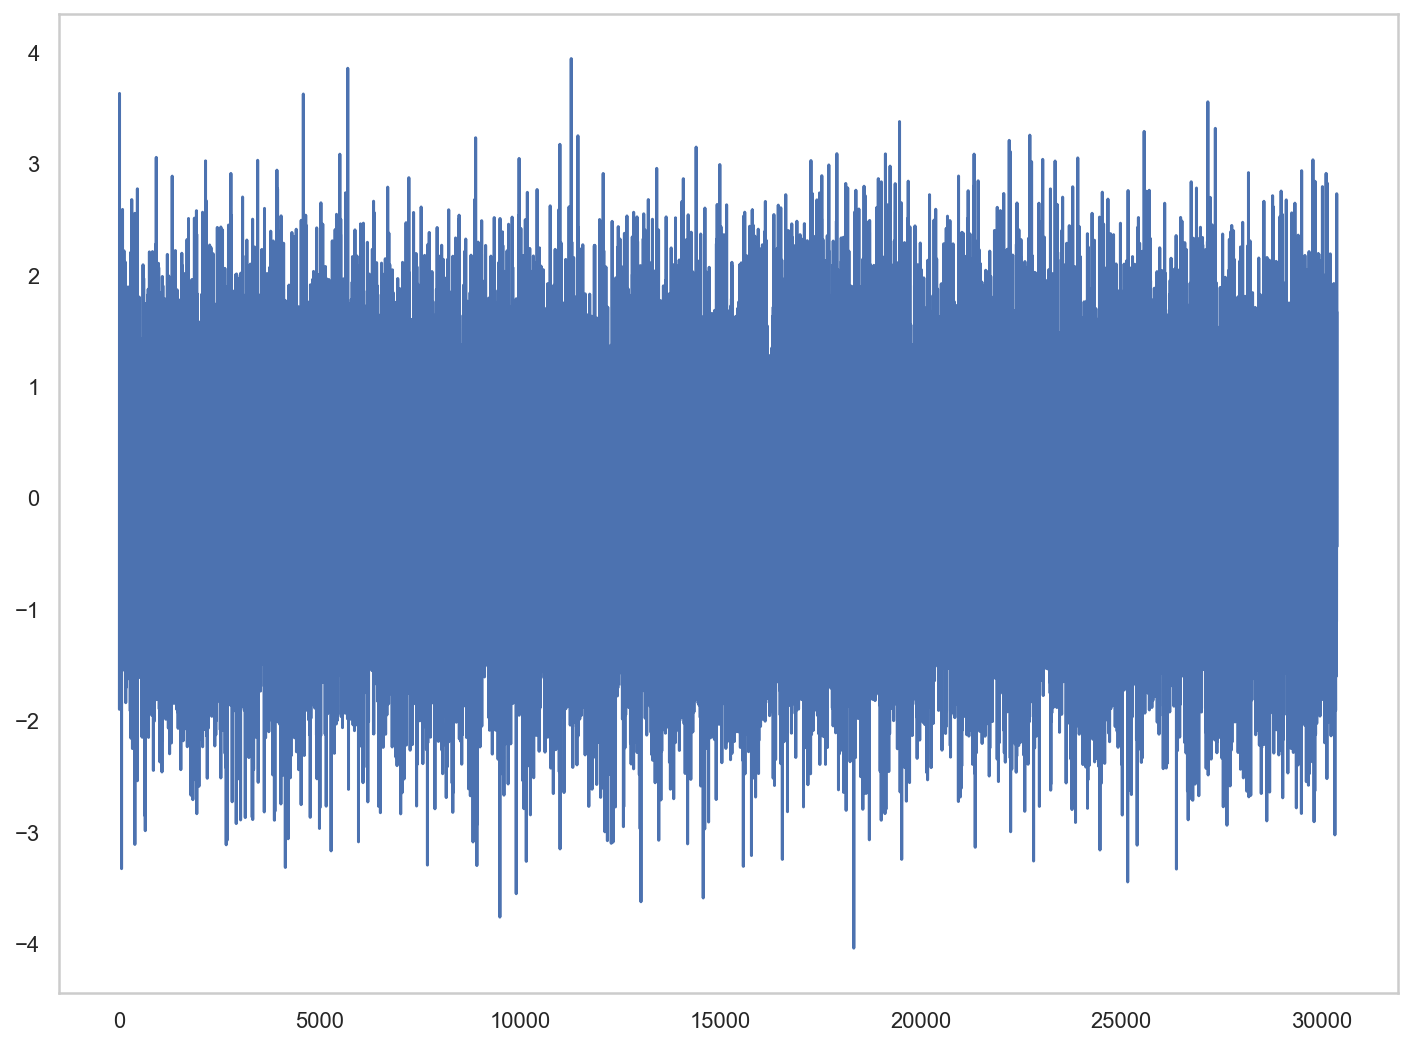

(19, 30390)
0.0
                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 3 - 40 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                         -2.1737, -0.0414                                         
                                                                                                  
                                       2 peaks were found:                                   

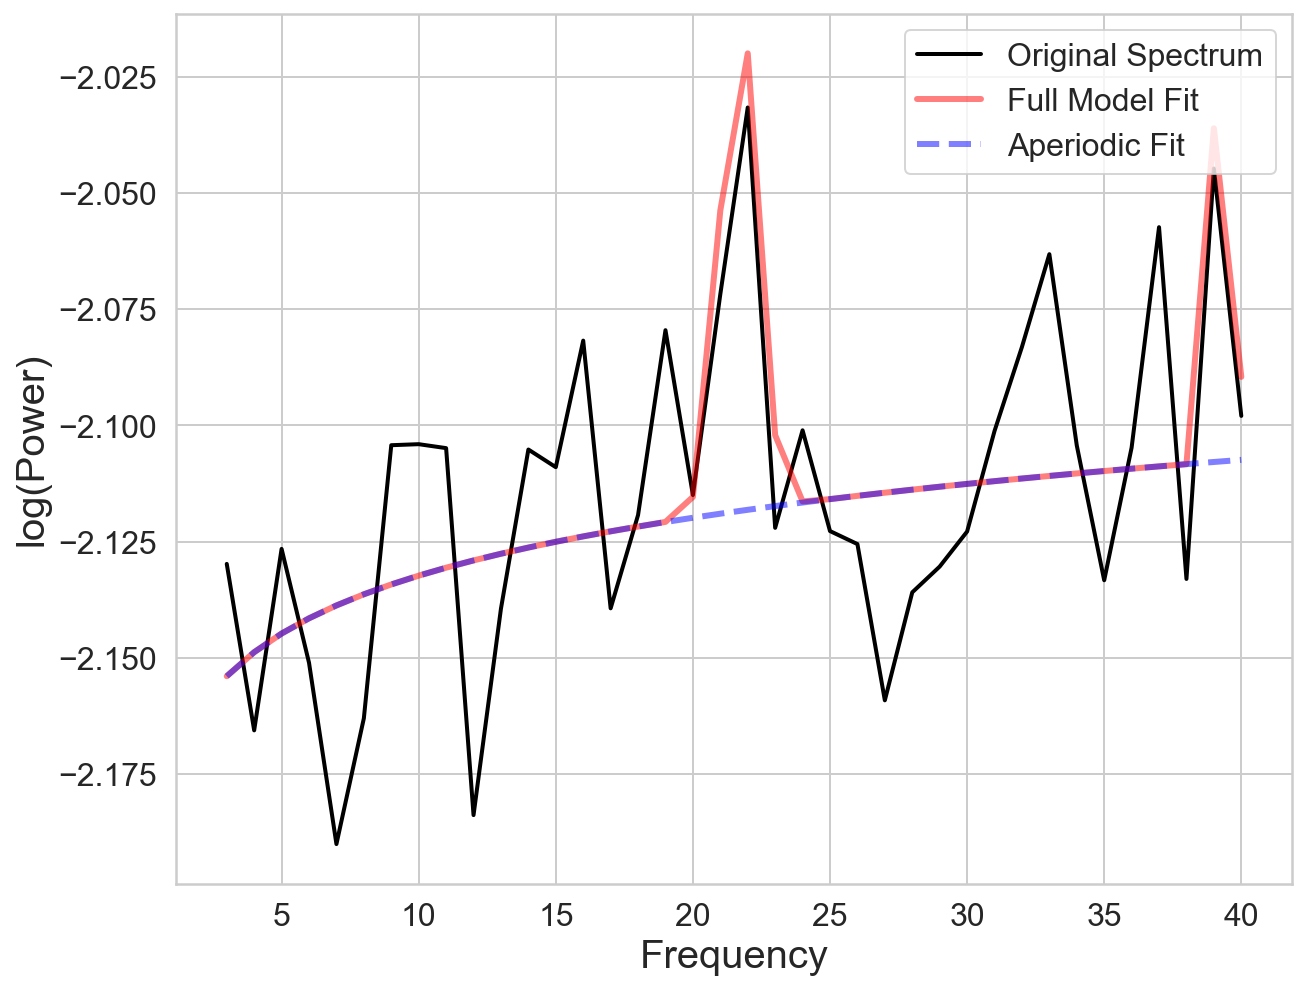

In [ ]:
white_noise = np.random.randn(time_points)

plt.plot(white_noise)
plt.show()

fs = 256 # sampling rate
time_points = len(raw_EC)

noise = np.tile(white_noise, (19, 1))

print(new_array.shape)

i = 0
j = 0

n_channels = 19
tau = 5
time_points = len(raw_EC)

Forw = np.zeros((n_channels, n_channels))
Rev = np.zeros((n_channels, n_channels))

forw_data = noise
rev_data = np.flip(forw_data, 1)


for i in range(n_channels):
    for j in range(n_channels):
      x = pearsonr(forw_data[i,0:time_points-tau], forw_data[j,tau:time_points])
      y = pearsonr(rev_data[i,0:time_points-tau], rev_data[j,tau:time_points])
      Forw[i,j] = x[0]
      Rev[i,j] = y[0]
Forw = -1/2 * np.log(1 - (Forw**2))
Rev = -1/2 * np.log(1 - (Rev**2))
irrev = np.mean((Forw - Rev)**2)
print(irrev)

freq_range = [3, 40]
fo = FOOOF()
fo.verbose = False
freqs, spectra = spectral.compute_spectrum(forw_data, fs)
spectra = np.mean(spectra, axis=0)
fo.add_data(freqs, spectra, freq_range)
fo.fit()
fo.report()
aperi = fo.get_params('aperiodic_params','exponent')
print('1/f slope: ')
print(aperi)

#noise has an irrev of basically 0 too